In [3]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read in Data

In [10]:
train = pd.read_csv("train.csv",index_col=0)
test = pd.read_csv("test.csv",index_col=0)

In [11]:
print ("Train data dimensions: ",train.shape)
print ("Test data dimensions: ",test.shape)

Train data dimensions:  (188318, 131)
Test data dimensions:  (125546, 130)


## Checkout dimension: a lot of variables, probably need selection

In [12]:
train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


## Some are categorical, some are numerical, we don't have the real names of variables.

In [13]:
print ("Number of missing values",train.isnull().sum().sum())

Number of missing values 0


In [14]:
print ("Number of duplicated rows: ",sum(train.duplicated(train.columns)))

Number of duplicated rows:  0


## No missing value and duplicated rows, safe to go

## Let's check for those numerical variables

In [15]:
train.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [19]:
contFeatureslist = []
for colName,x in train.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        contFeatureslist.append(colName)

In [20]:
print (contFeatureslist)

['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']


In [21]:
contFeatureslist.remove("loss")

/home/peimengsui/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


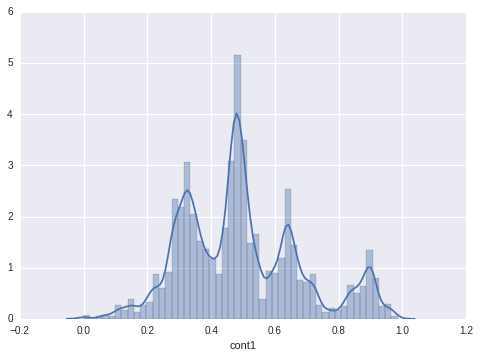

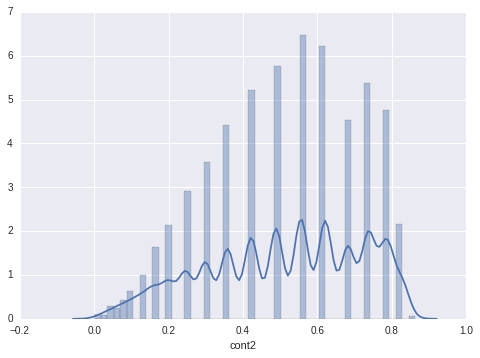

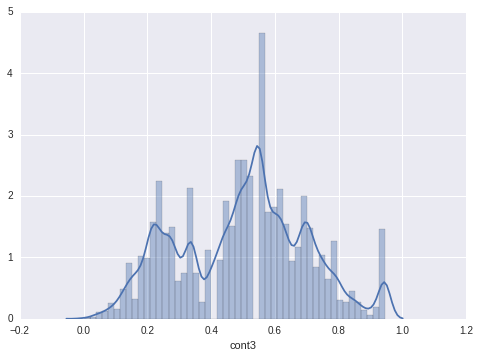

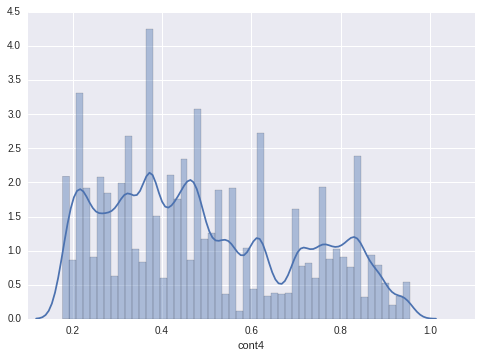

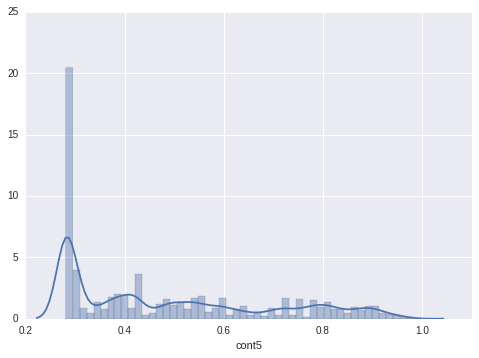

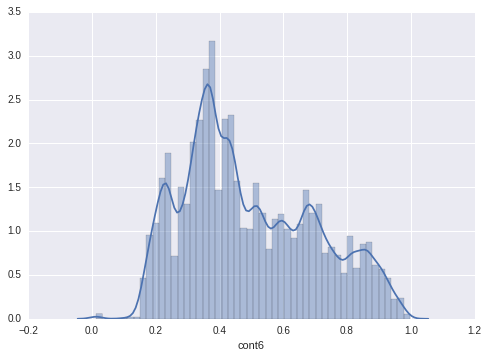

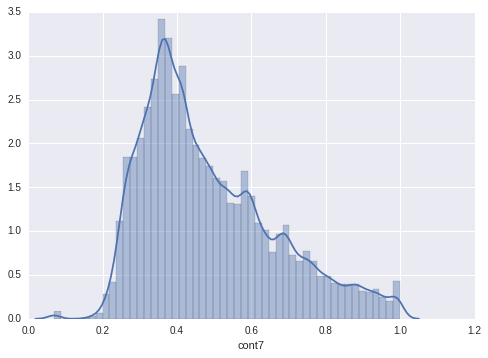

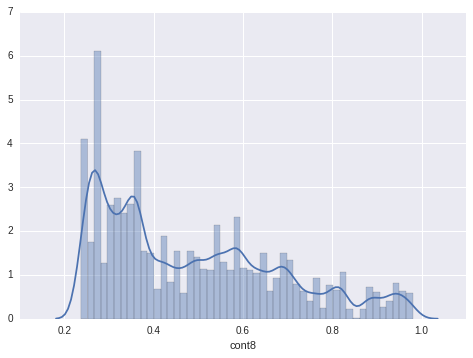

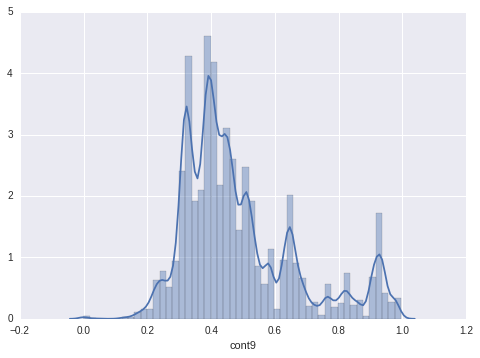

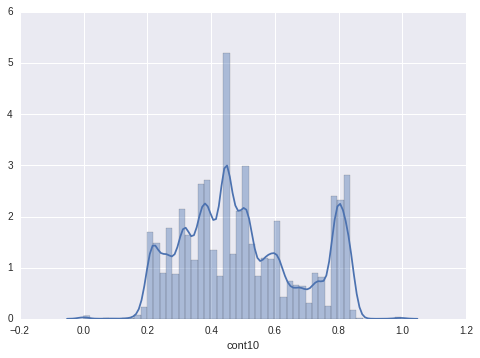

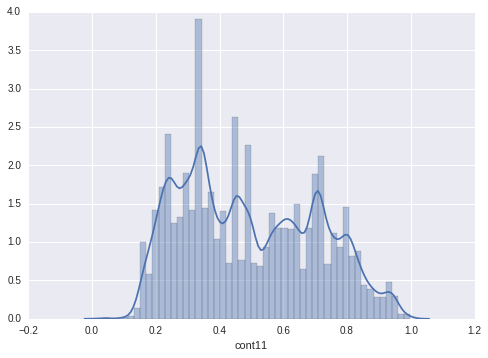

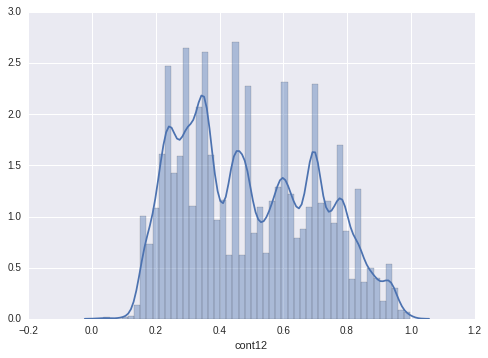

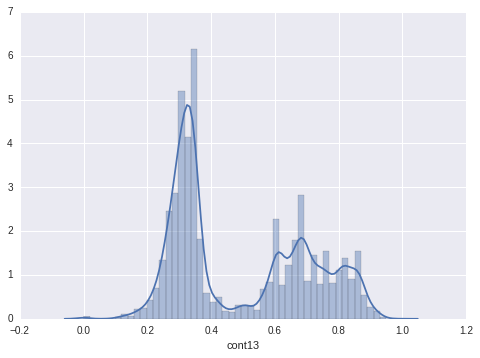

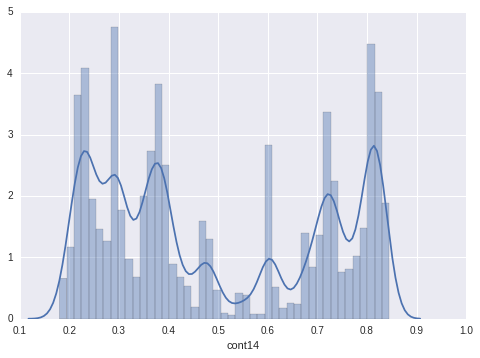

In [22]:
for col in contFeatureslist:
    sns.distplot(train[col])
    plt.show()

## Some can be binned to discrete categorical variables

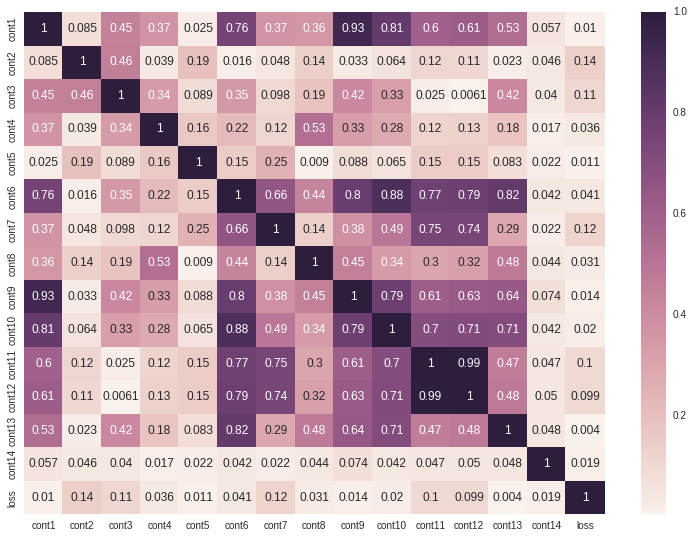

In [24]:
contFeatureslist.append("loss")
correlationMatrix = train[contFeatureslist].corr().abs()
plt.subplots(figsize=(13,9))
sns.heatmap(correlationMatrix,annot=True)
plt.show()

## Some have very high correlations(cont6-13,cont1), but nothing very high correlation with target variables, consider select some using preprocess

/home/peimengsui/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


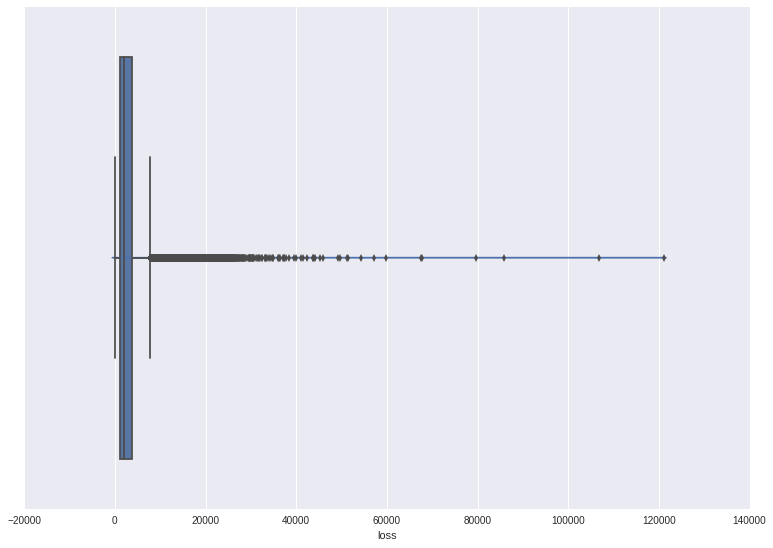

In [25]:
plt.figure(figsize=(13,9))
sns.distplot(train["loss"])
sns.boxplot(train["loss"])

## Very long tail of target variable, try log transform

/home/peimengsui/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


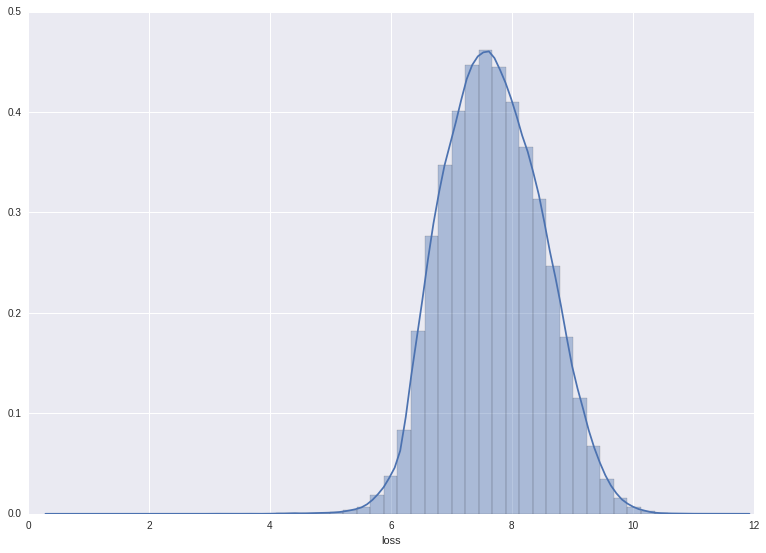

In [26]:
plt.figure(figsize=(13,9))
sns.distplot(np.log1p(train["loss"]))

## Very good transformation to a normal distribution
## Now let's check for categorical ones

In [27]:
catCount = sum(str(x).isalpha() for x in train.iloc[1,:])
print ("Number of categories: ",catCount)

Number of categories:  116


In [28]:
catFeatureslist = []
for colName,x in train.iloc[1,:].iteritems():
    if(str(x).isalpha()):
        catFeatureslist.append(colName)

In [29]:
for c in catFeatureslist:
    values={}
    for v in train[c]:
        if v in values:
            values[v]+=1
        else: 
            values[v]=1
    for v in test[c]:
        if v not in values:
            print (c,v,"not found in test!")

cat89 F not found in test!
cat89 F not found in test!
cat92 G not found in test!
cat92 E not found in test!
cat92 E not found in test!
cat96 H not found in test!
cat99 U not found in test!
cat103 M not found in test!
cat106 Q not found in test!
cat109 AD not found in test!
cat109 AD not found in test!
cat110 BH not found in test!
cat110 CA not found in test!
cat110 EN not found in test!
cat111 L not found in test!
cat113 AA not found in test!
cat113 R not found in test!
cat116 AQ not found in test!
cat116 EM not found in test!
cat116 FY not found in test!
cat116 AI not found in test!
cat116 N not found in test!
cat116 ET not found in test!
cat116 KO not found in test!
cat116 BJ not found in test!
cat116 IW not found in test!
cat116 DB not found in test!
cat116 LP not found in test!
cat116 MX not found in test!
cat116 BR not found in test!
cat116 LP not found in test!
cat116 BH not found in test!
cat116 JS not found in test!
cat116 KO not found in test!
cat116 ER not found in test!
cat1

## There are categories only appeared in training set

In [30]:
col_uniques=[]
for col in catFeatureslist:
    col_uniques.append([col,len(train[col].unique())])
print (col_uniques)

[['cat1', 2], ['cat2', 2], ['cat3', 2], ['cat4', 2], ['cat5', 2], ['cat6', 2], ['cat7', 2], ['cat8', 2], ['cat9', 2], ['cat10', 2], ['cat11', 2], ['cat12', 2], ['cat13', 2], ['cat14', 2], ['cat15', 2], ['cat16', 2], ['cat17', 2], ['cat18', 2], ['cat19', 2], ['cat20', 2], ['cat21', 2], ['cat22', 2], ['cat23', 2], ['cat24', 2], ['cat25', 2], ['cat26', 2], ['cat27', 2], ['cat28', 2], ['cat29', 2], ['cat30', 2], ['cat31', 2], ['cat32', 2], ['cat33', 2], ['cat34', 2], ['cat35', 2], ['cat36', 2], ['cat37', 2], ['cat38', 2], ['cat39', 2], ['cat40', 2], ['cat41', 2], ['cat42', 2], ['cat43', 2], ['cat44', 2], ['cat45', 2], ['cat46', 2], ['cat47', 2], ['cat48', 2], ['cat49', 2], ['cat50', 2], ['cat51', 2], ['cat52', 2], ['cat53', 2], ['cat54', 2], ['cat55', 2], ['cat56', 2], ['cat57', 2], ['cat58', 2], ['cat59', 2], ['cat60', 2], ['cat61', 2], ['cat62', 2], ['cat63', 2], ['cat64', 2], ['cat65', 2], ['cat66', 2], ['cat67', 2], ['cat68', 2], ['cat69', 2], ['cat70', 2], ['cat71', 2], ['cat72', 2], 

## Some variables have many levels, consider drop or combine, sparse matrix is necessary to save space

/home/peimengsui/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


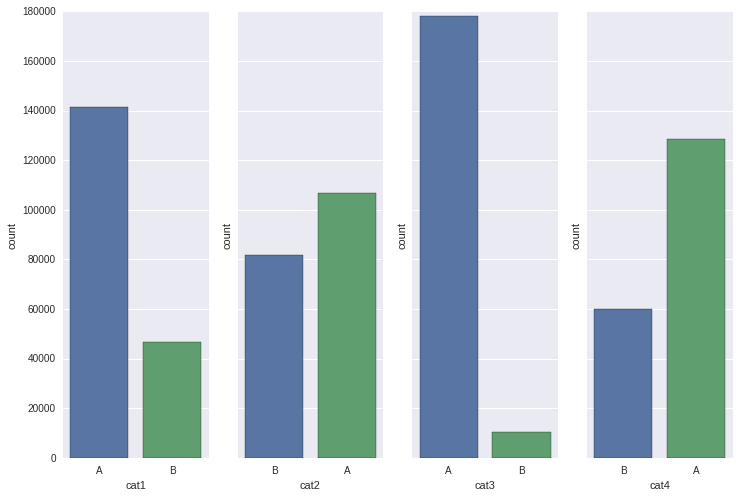

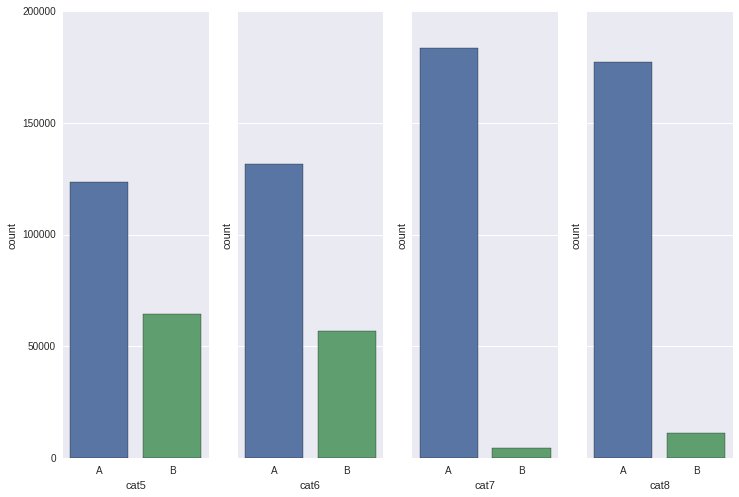

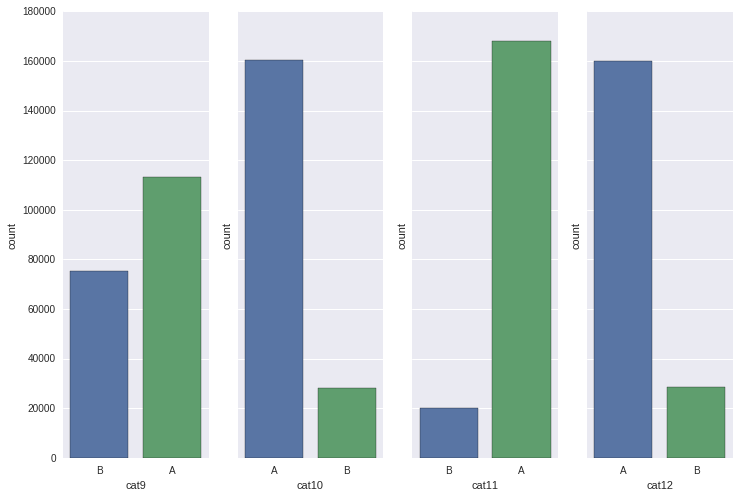

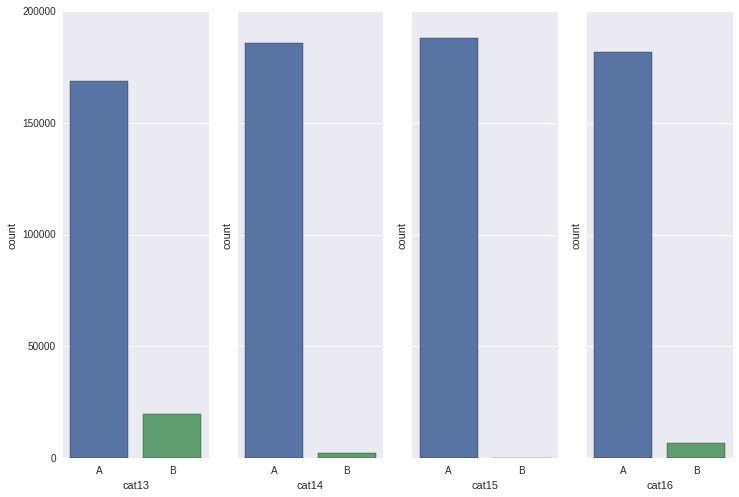

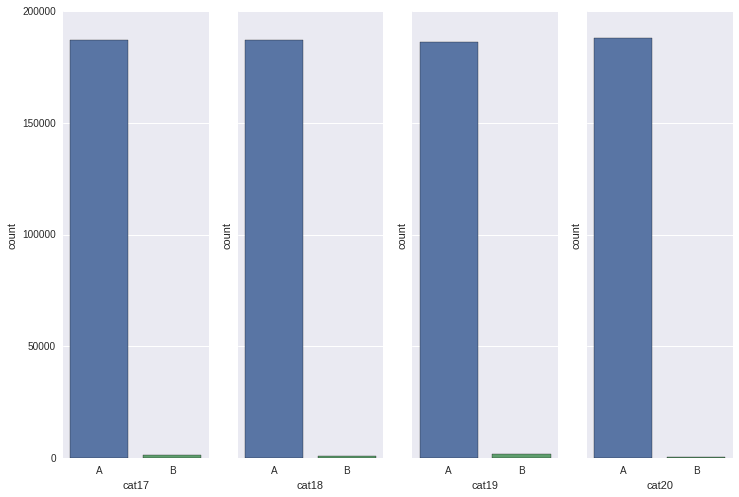

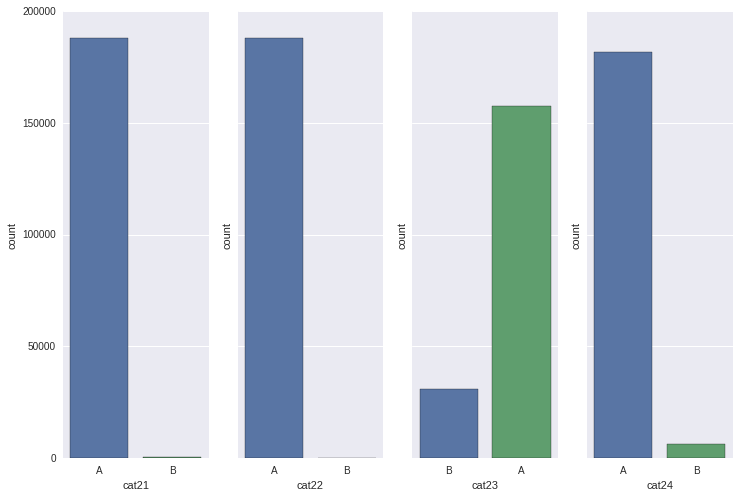

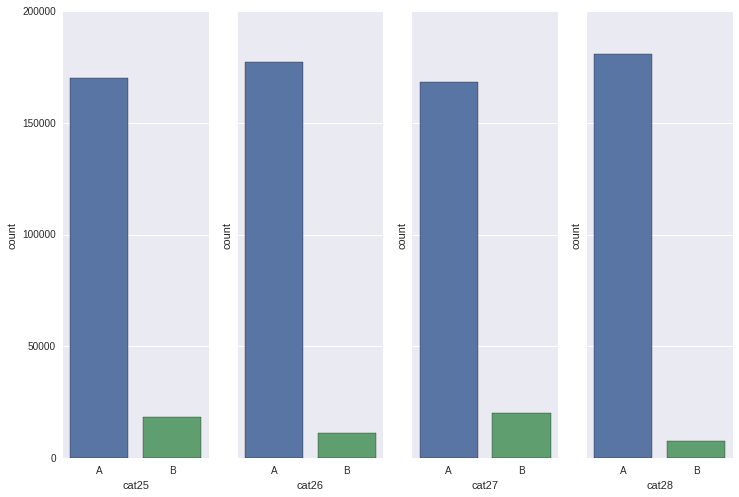

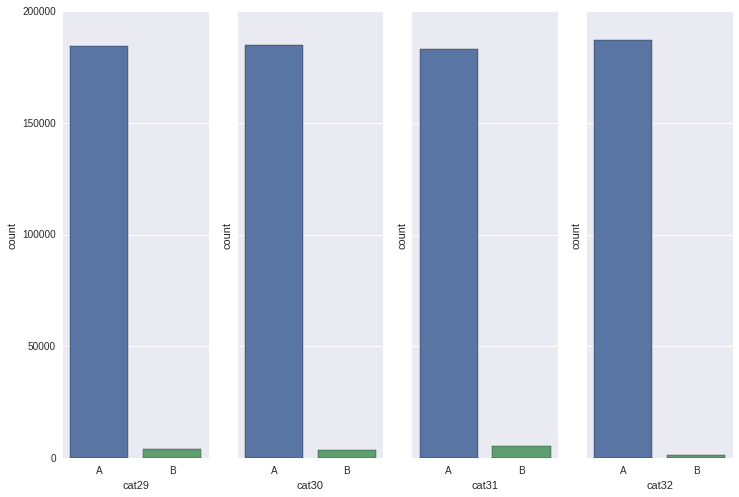

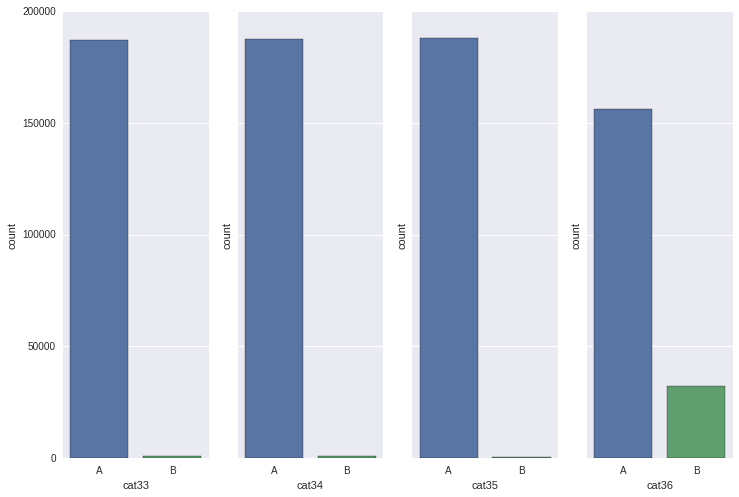

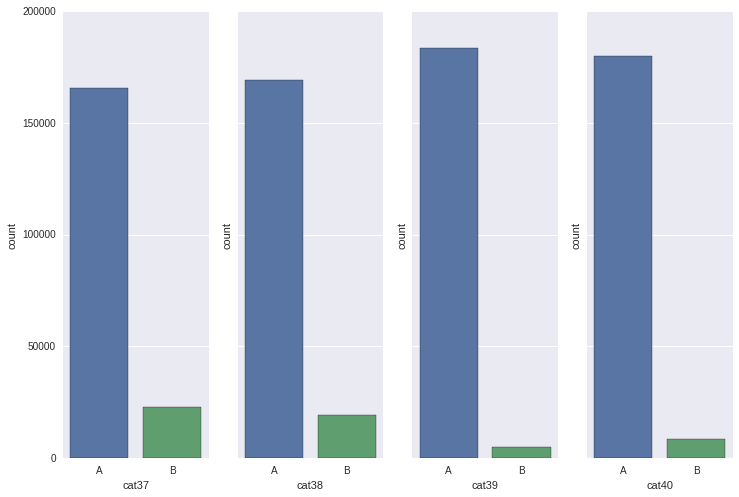

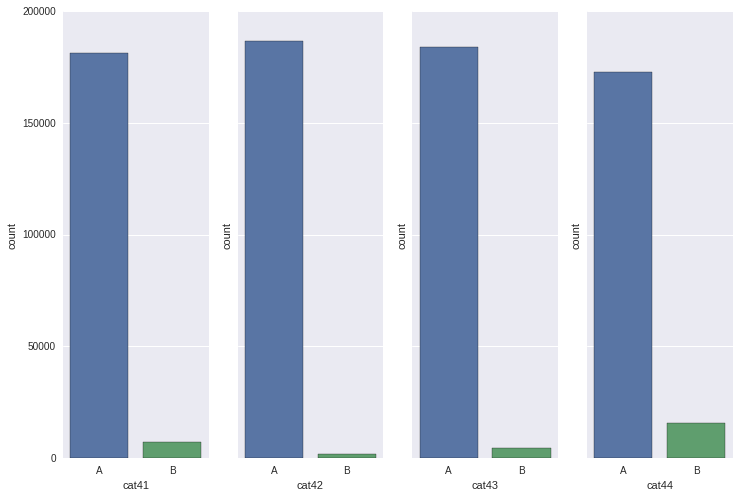

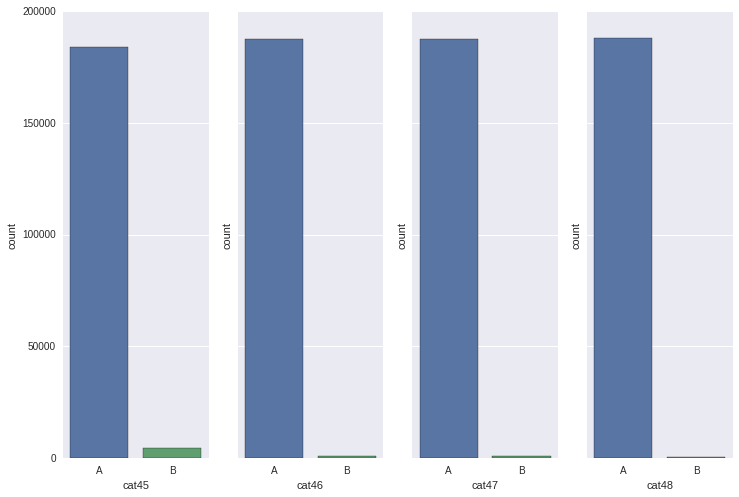

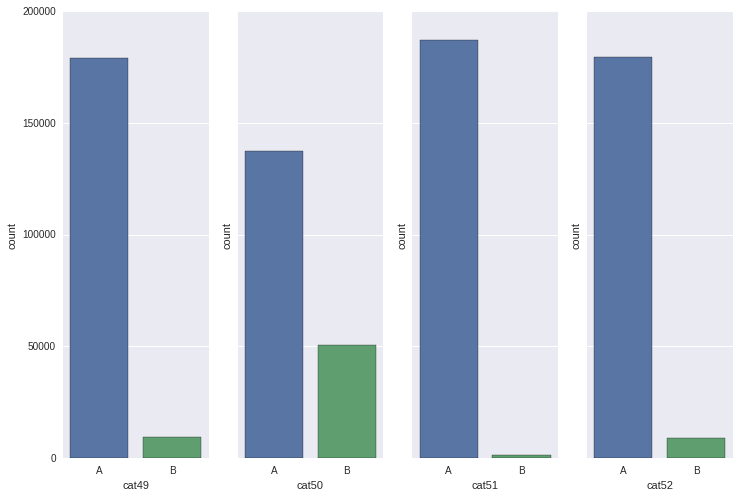

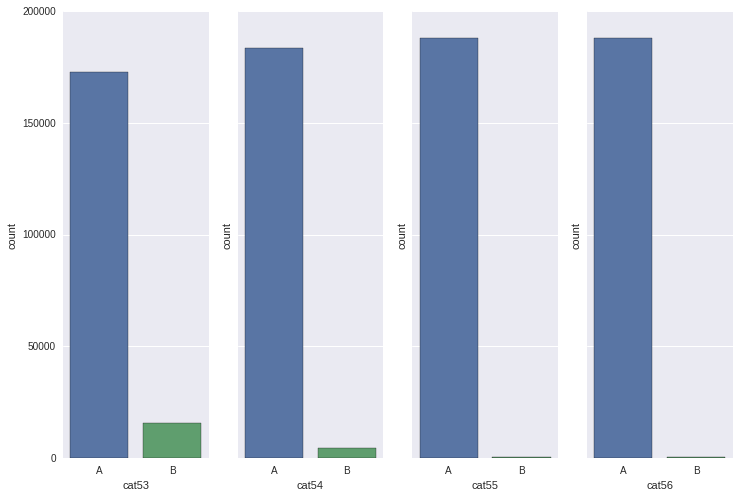

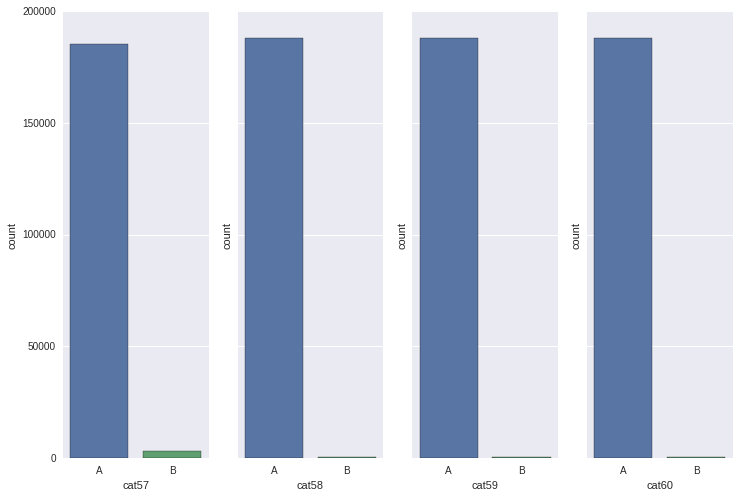

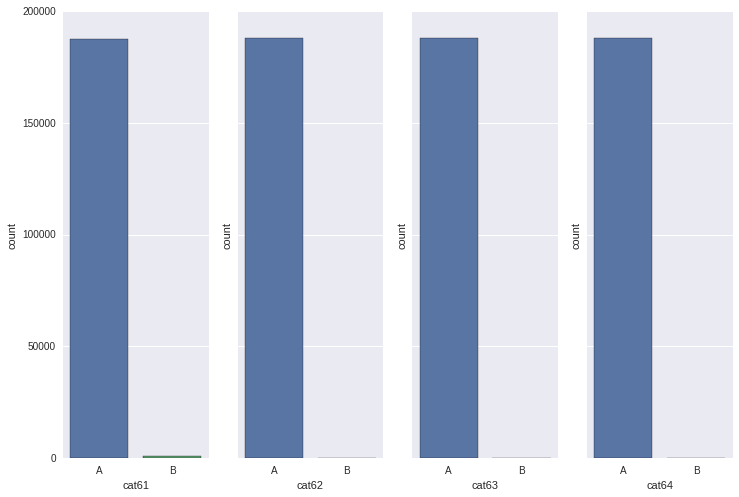

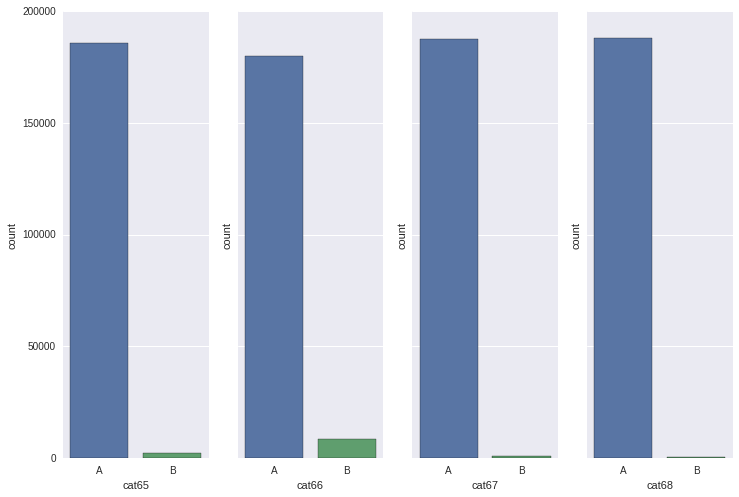

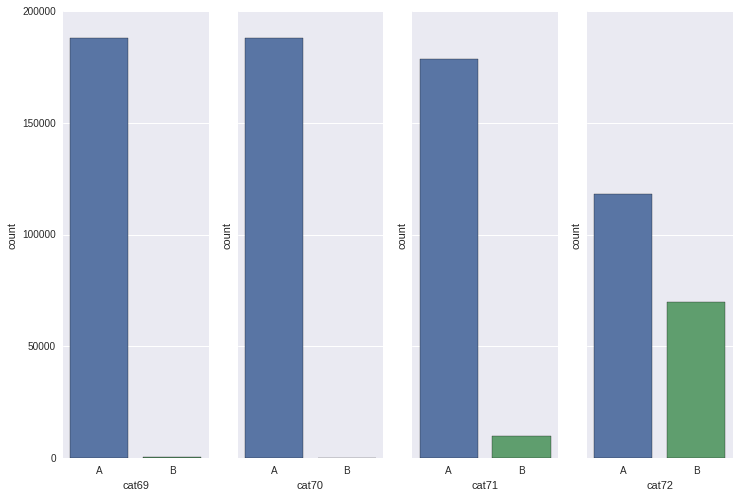

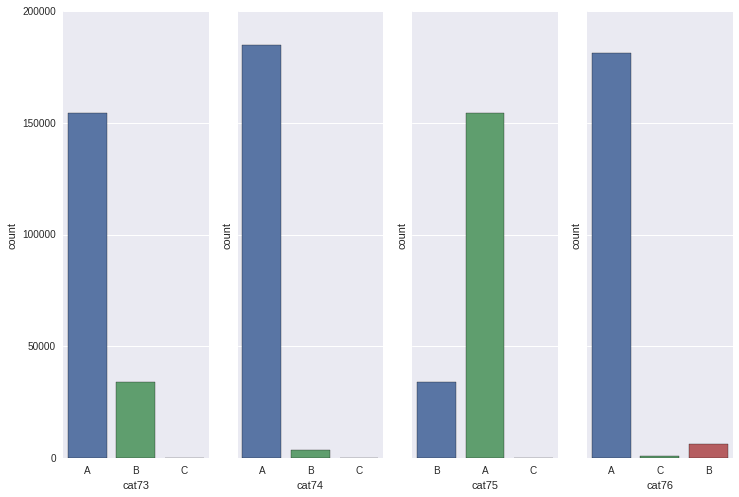

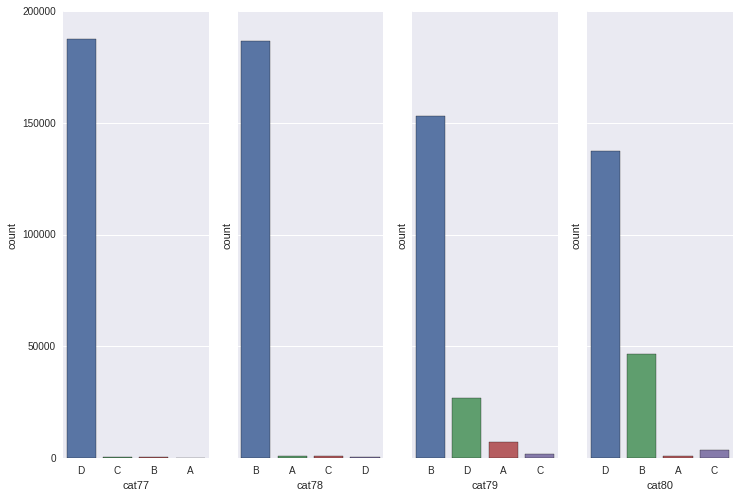

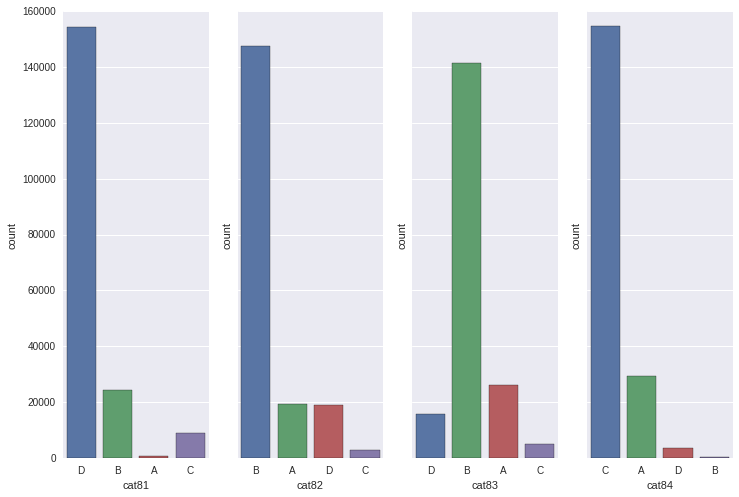

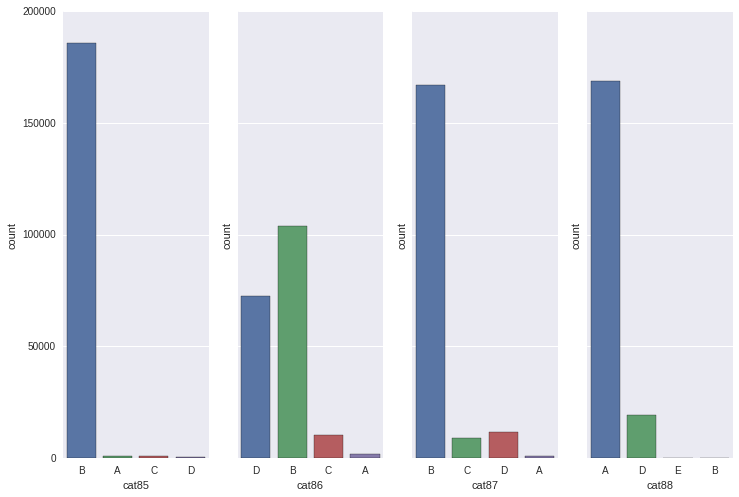

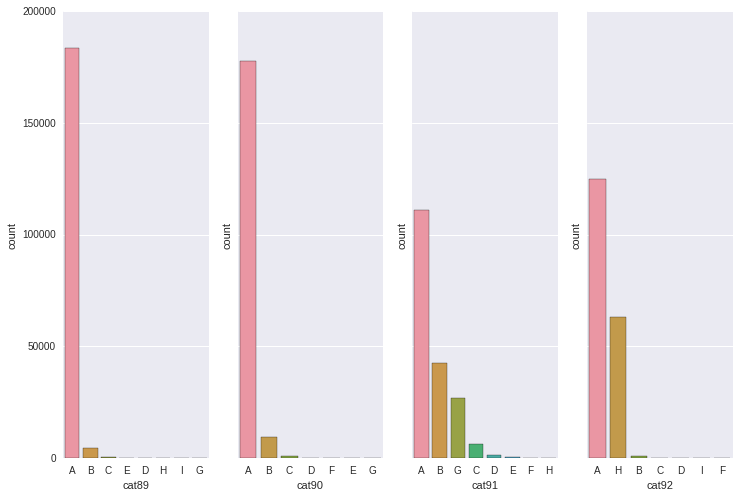

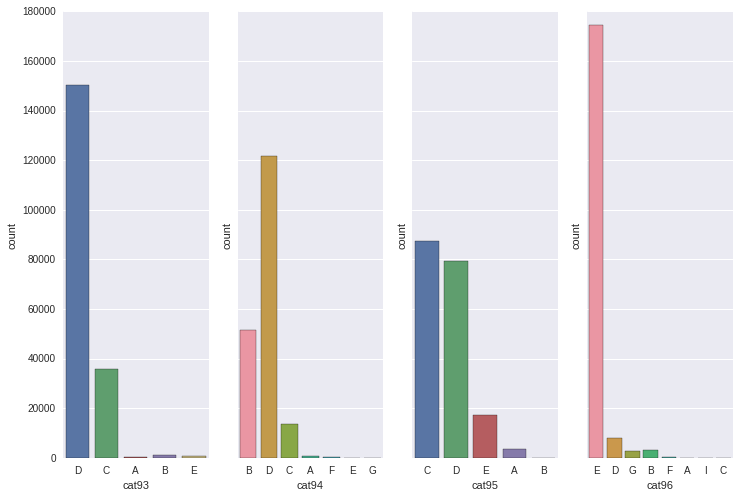

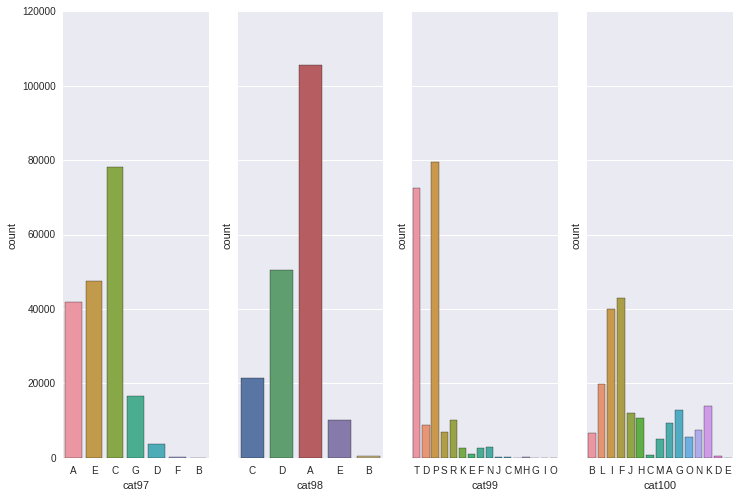

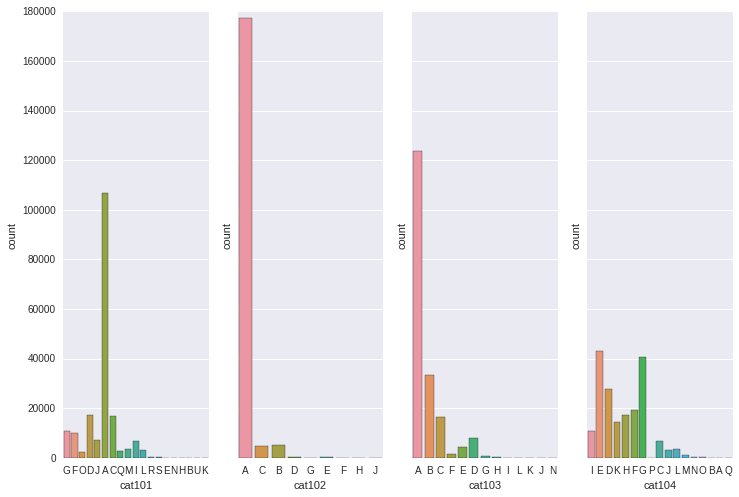

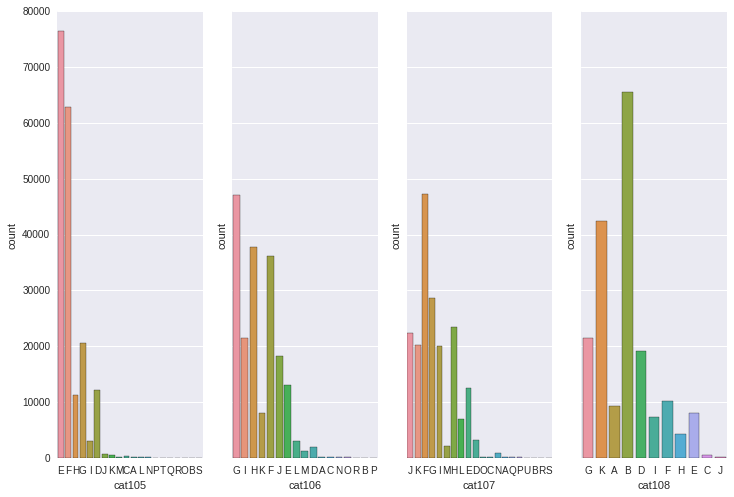

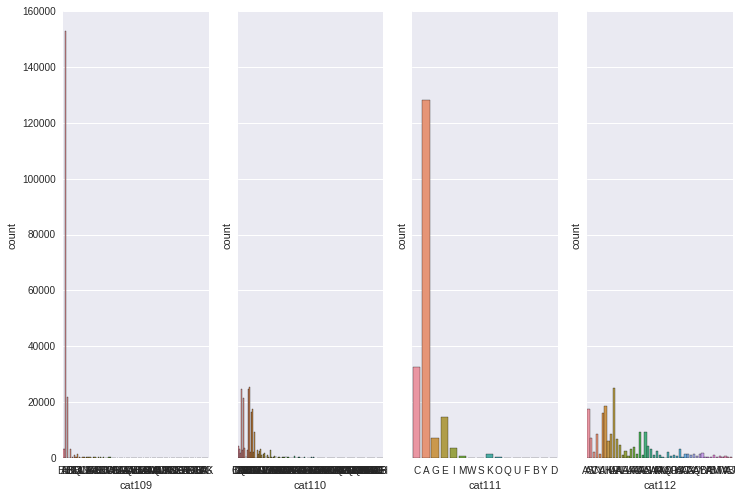

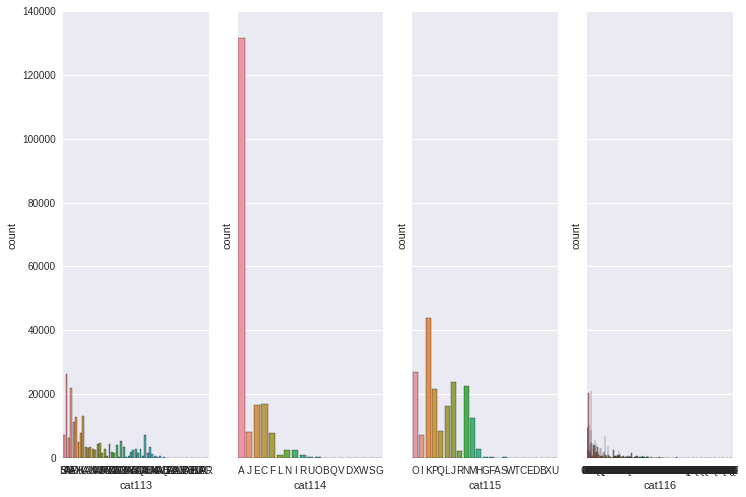

In [39]:
catFeatureslist

#Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=catFeatureslist[i*n_cols+j], data=train, ax=ax[j])

## Categorical variables seem to be stronger classifier, some with many levels contain some dominant groups, which can be consider to be combined. 